In [1]:
import pbjam as pb
import lightkurve as lk 
import importlib

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
print(f'PBjam version {pb.__version__}')
print(f'Lightkurve version {lk.__version__}')

PBjam version 0.1.9
Lightkurve version 1.5.dev


In [5]:
ID = '211416749'
numax = [224.3, 1.3]
dnu = [16.88, 0.05]
teff = [4851, 80]
bp_rp = [1.34, 0.2]

In [6]:
lcs = lk.search_lightcurvefile(ID, mission='K2').download_all()

In [7]:
lc = lcs.PDCSAP_FLUX.stitch().flatten(window_length=1001).normalize('ppm').remove_outliers(5)

/Users/davies/Software/lightkurve/lightkurve/lightcurve.py:667: LightkurveWarning: The light curve already appears to be in relative units; `normalize()` will convert the light curve into relative units for a second time, which is probably not what you want.
  LightkurveWarning)


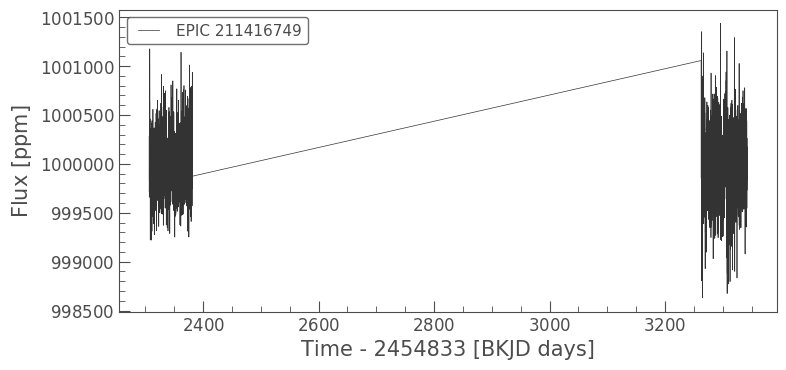

In [8]:
lc.plot()

In [38]:
pg = lc.to_periodogram(normalization='psd', maximum_frequency=288.0).flatten()

In [39]:
seismology = pg.to_seismology()
seismology.estimate_numax()
seismology.estimate_deltanu()

deltanu: 16.77 uHz (method: ACF2D)

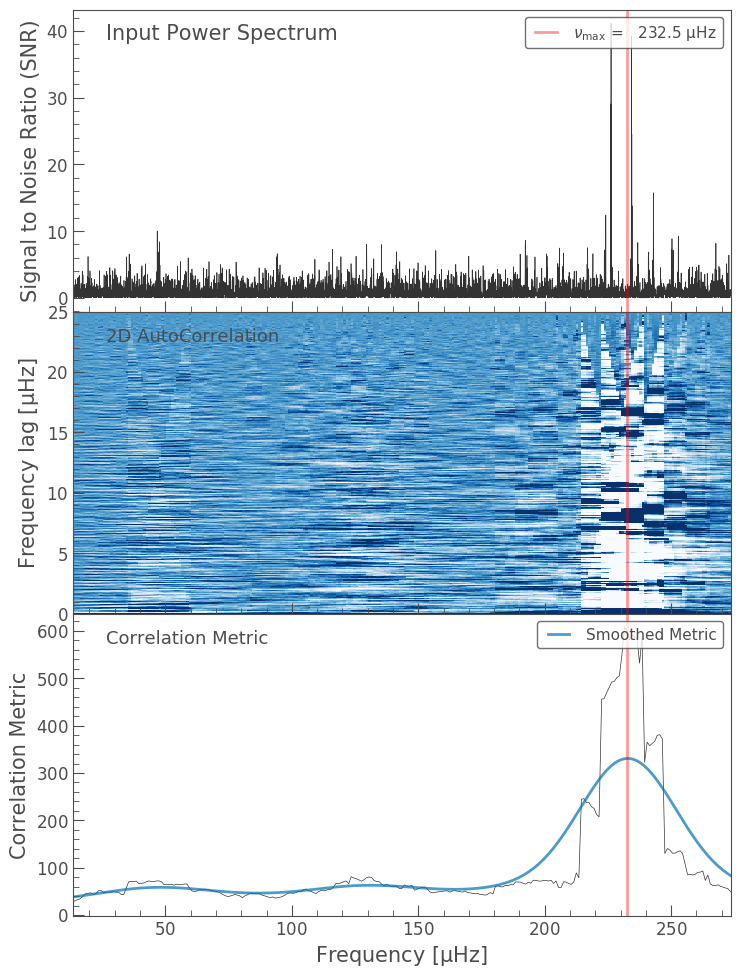

In [40]:
seismology.diagnose_numax();

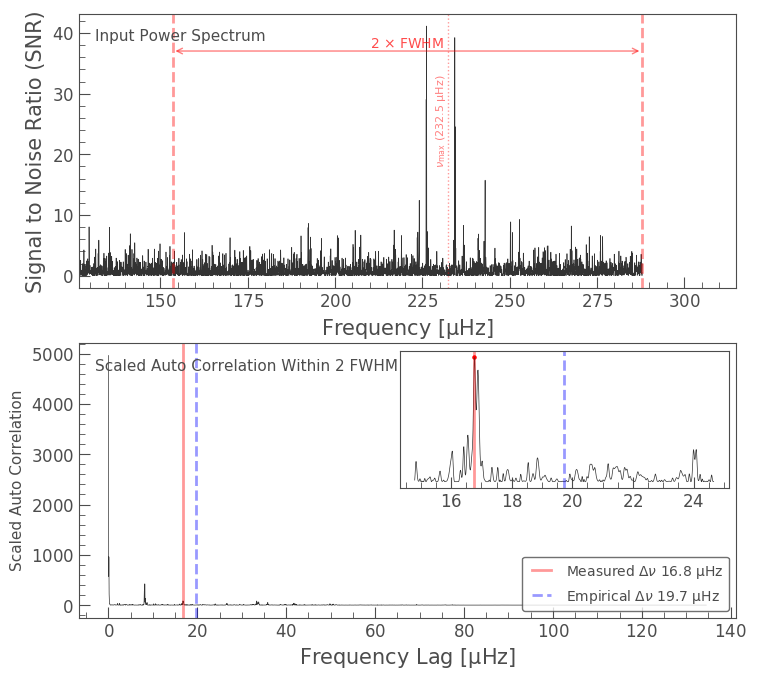

In [41]:
seismology.diagnose_deltanu();

In [42]:
numax = [seismology.numax.value, 5.0]
dnu = [16.88, 0.1]

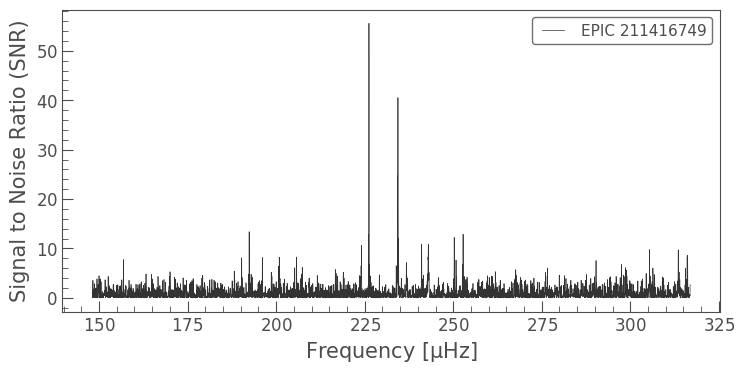

In [47]:
pg = lc.to_periodogram(normalization='psd',
                      minimum_frequency=numax[0] - dnu[0] * 5,
                      maximum_frequency=numax[0] + dnu[0] * 5).flatten()
pg.plot()

In [48]:
star = pb.star(epic, pg, 
               numax, dnu, teff, bp_rp)

Starting KDE estimation


/Users/davies/Code/PBjam/pbjam/priors.py:66: UserWarning: There are only 105 stars in the prior. I will expand the prior untill I have 100 stars.
  'I will expand the prior untill I have 100 stars.')


Steps taken: 2000
Steps taken: 3000
Steps taken: 4000
Chains reached stationary state after 4000 iterations.
Starting Asy_peakbag
Steps taken: 2000
Steps taken: 3000
Chains reached stationary state after 3000 iterations.
Starting peakbagging run


Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [back, height2, height0, l2, l0, width2, width0]
The estimated number of effective samples is smaller than 200 for some parameters.


CPU times: user 8min 10s, sys: 6.9 s, total: 8min 17s
Wall time: 8min 20s


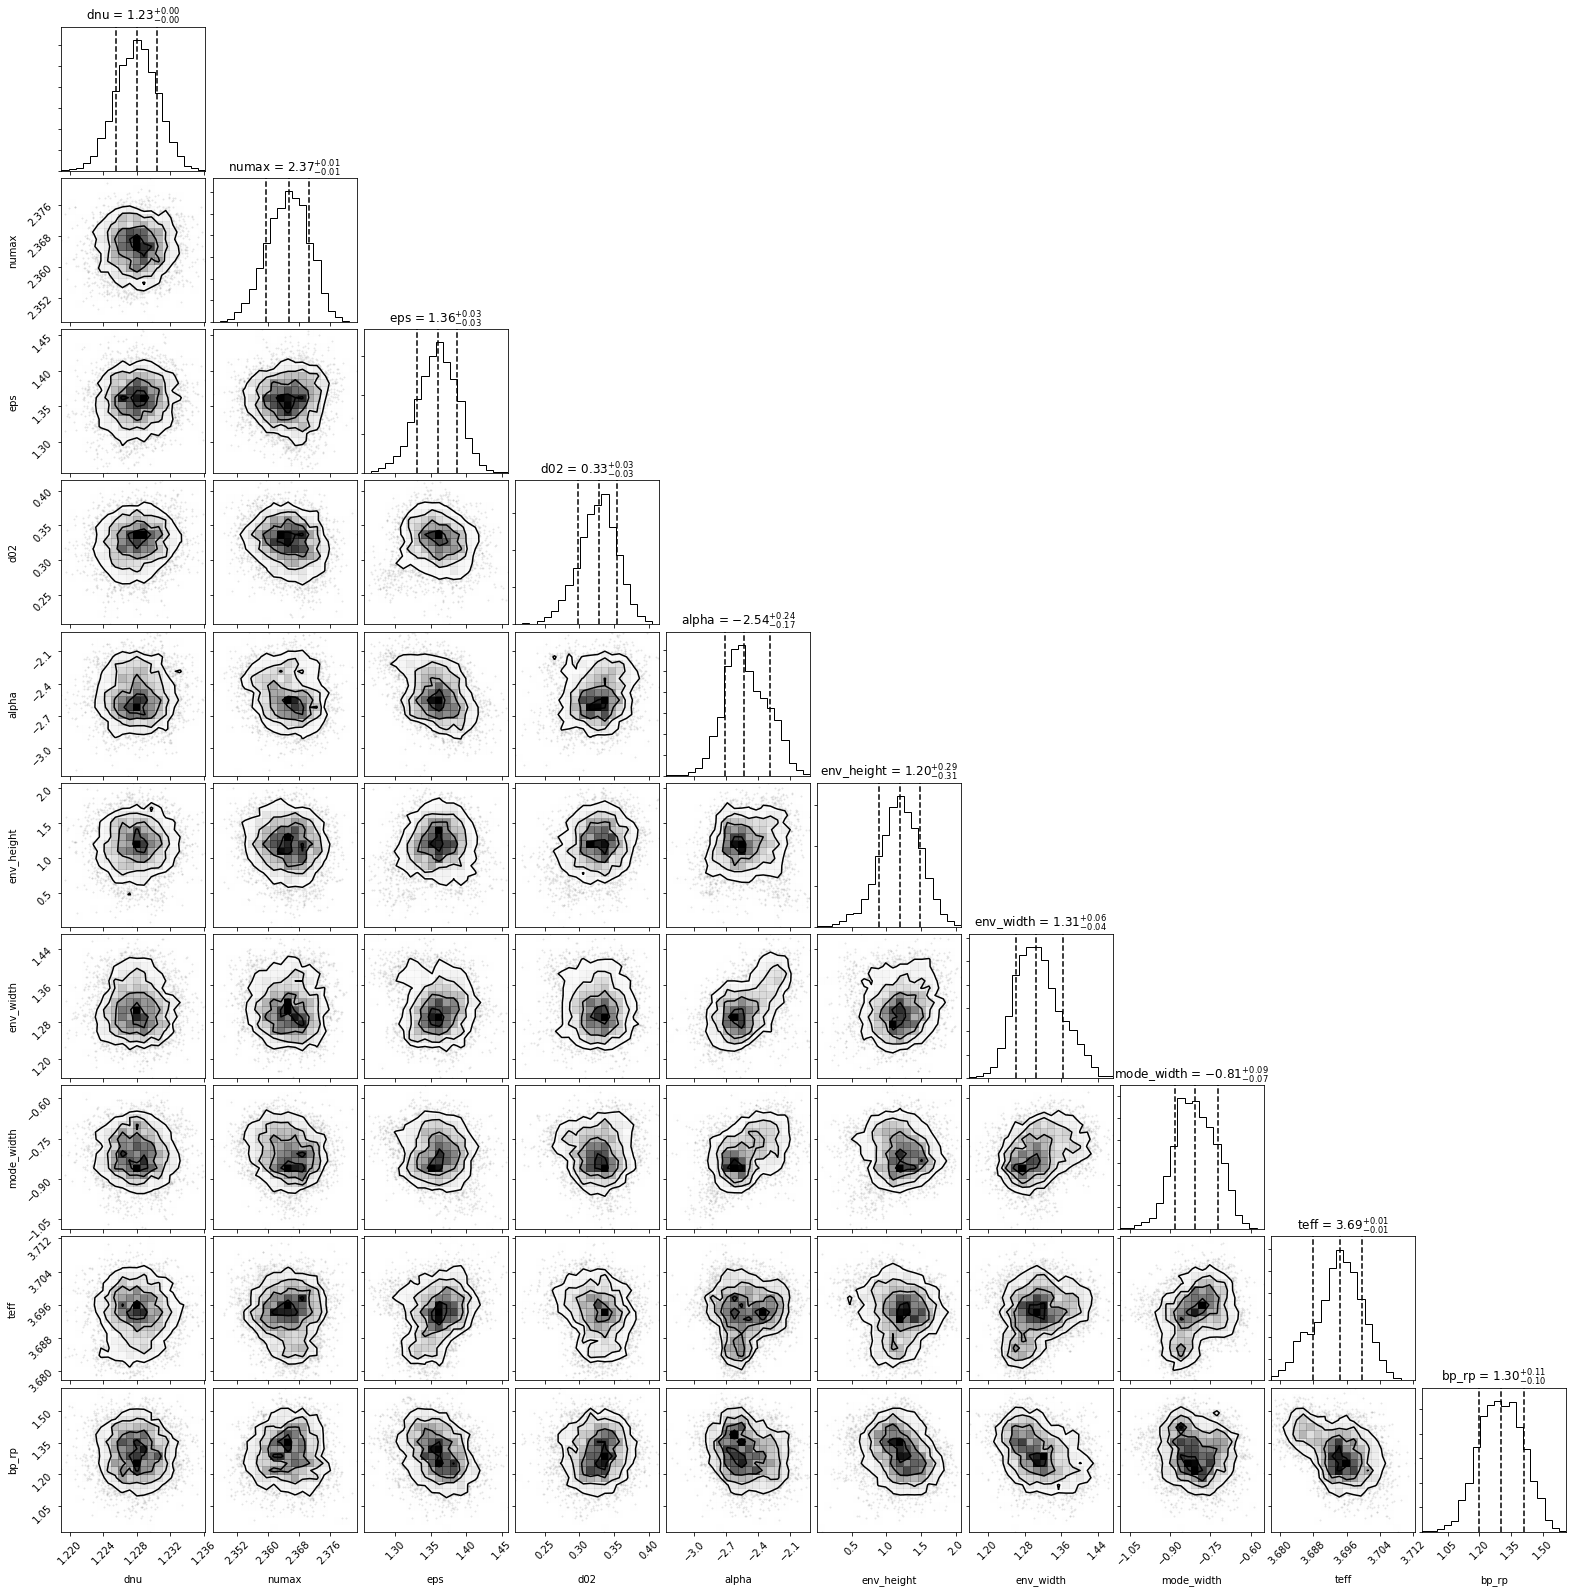

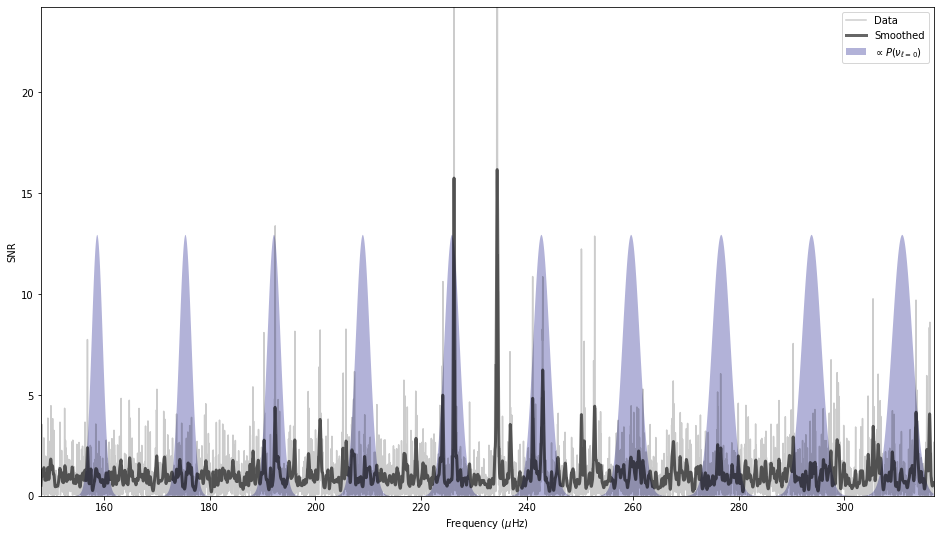

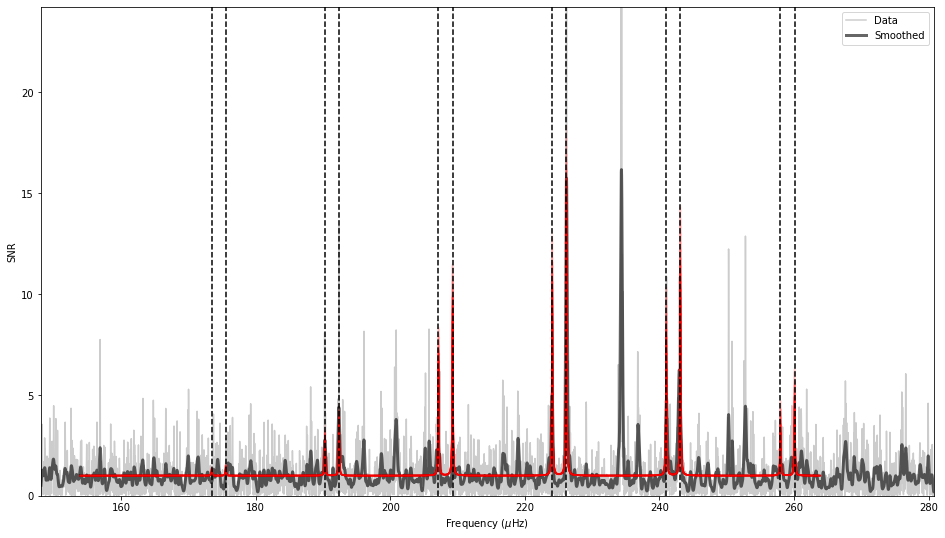

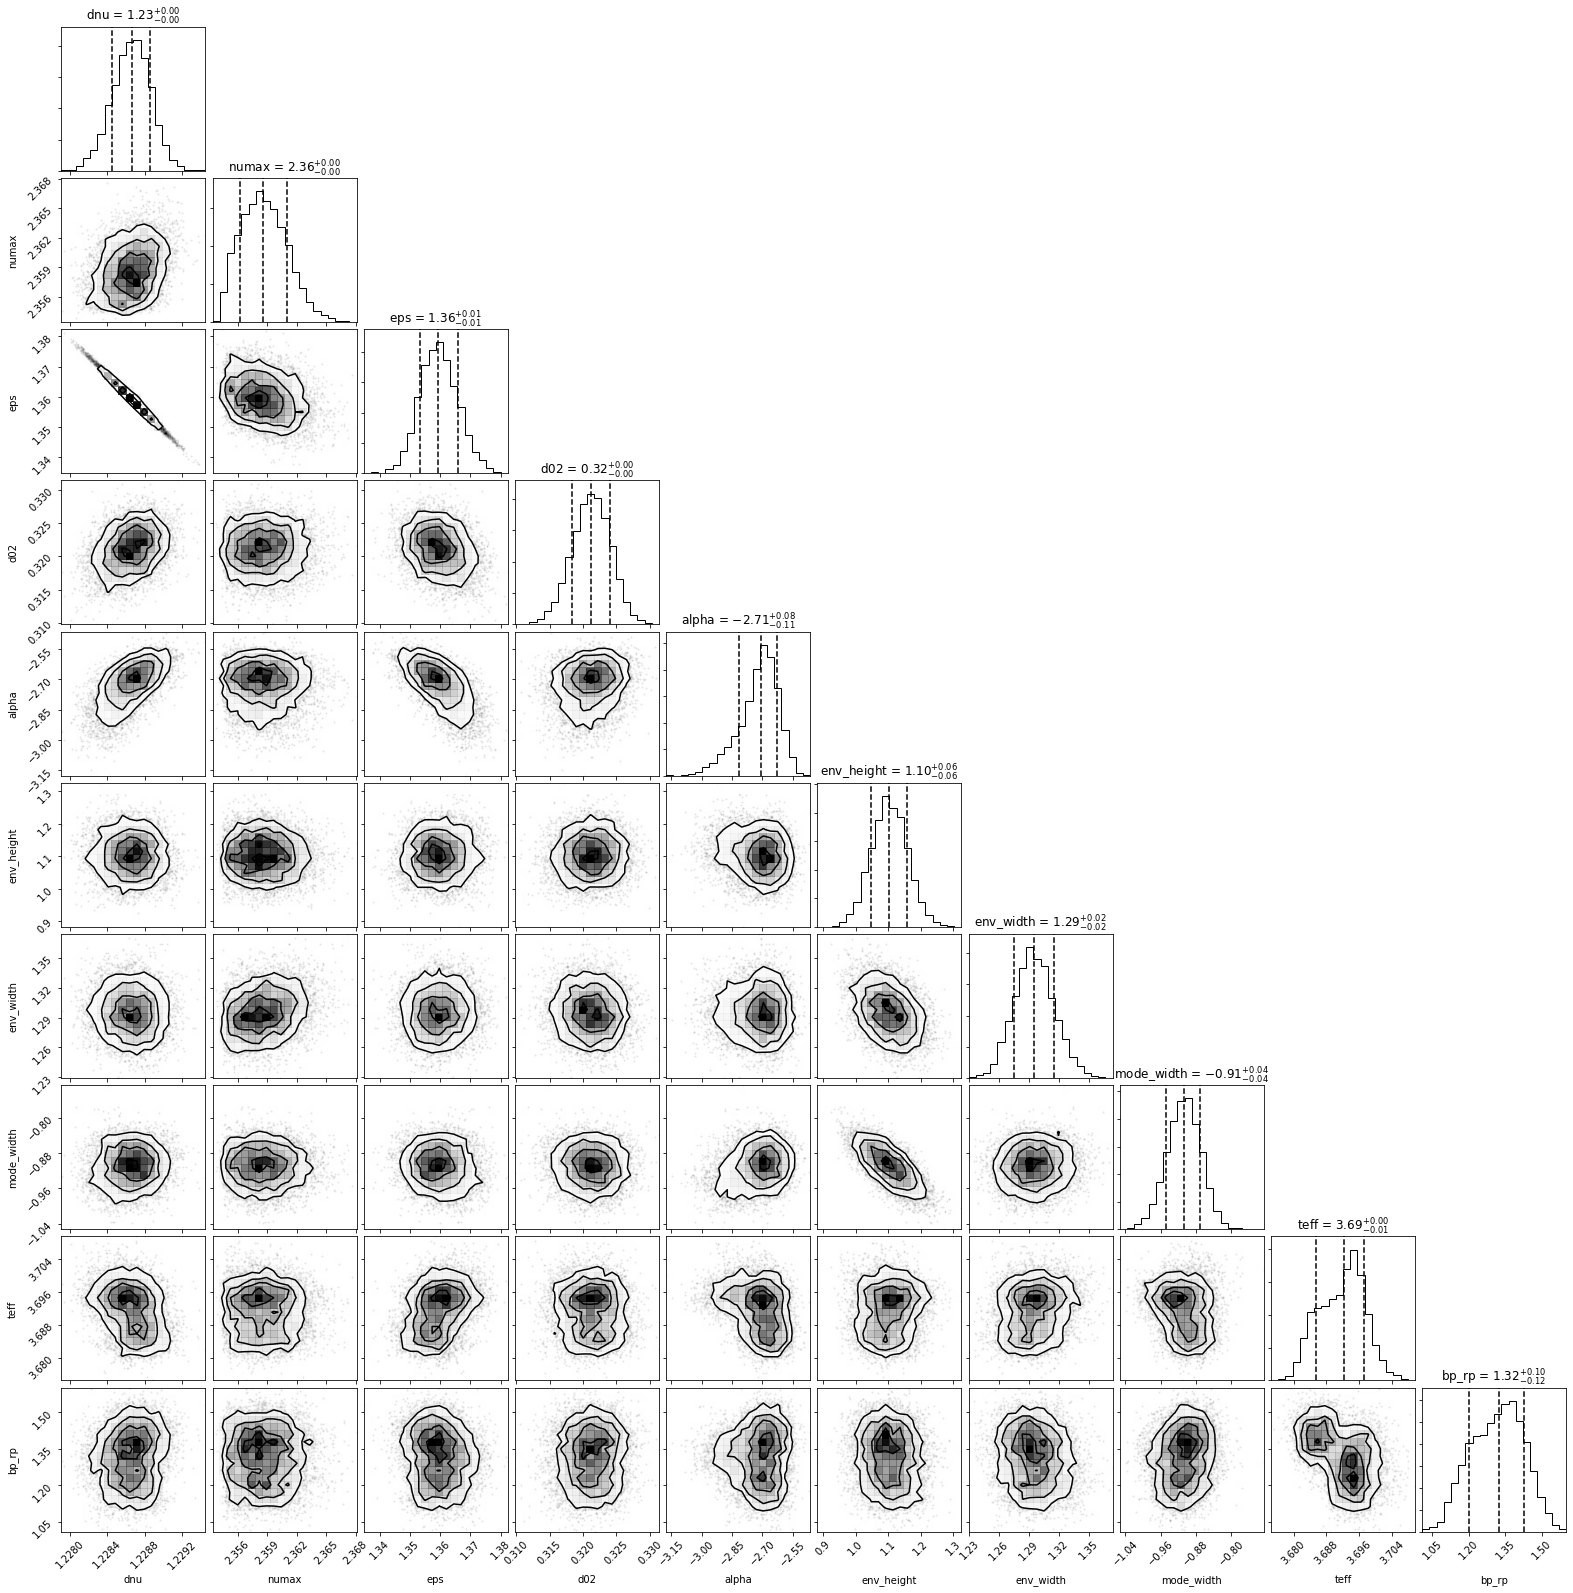

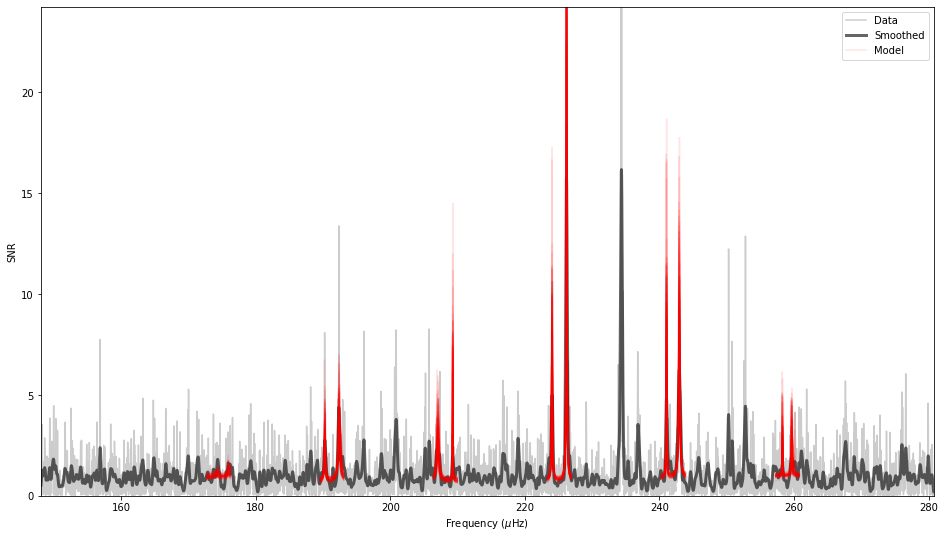

In [49]:
%%time
star(norders=6)

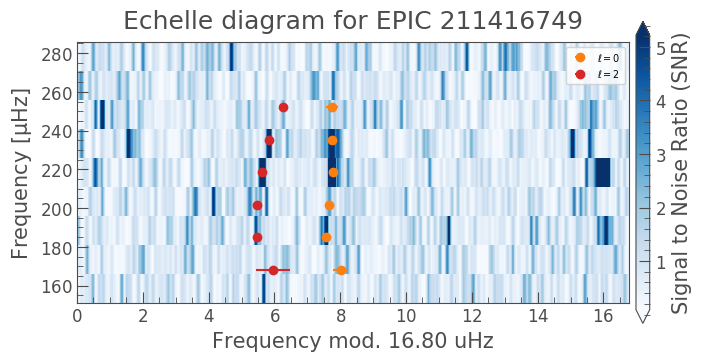

In [50]:
star.peakbag.plot_echelle()